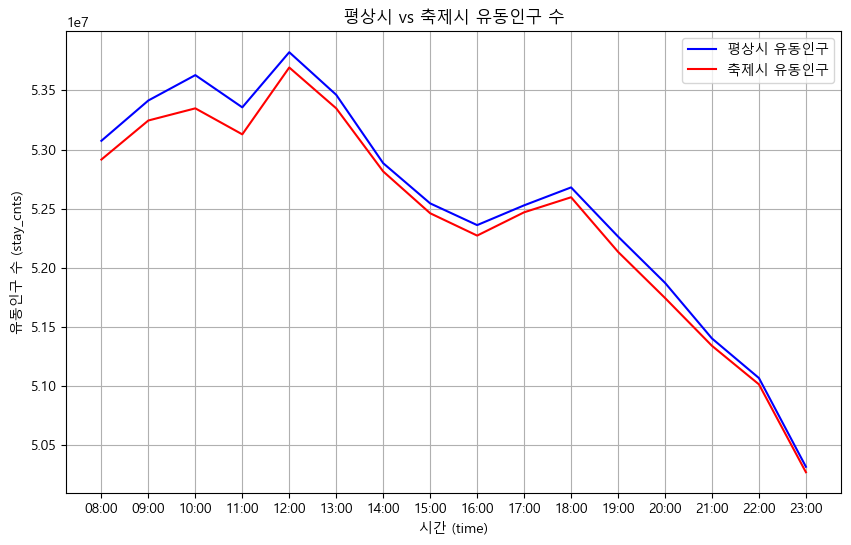

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 행정동코드 설정
target_hdong_cd = 4117154000

# CSV 파일 불러오기
file_normal = 'csv\stay_20230917_1.csv'  # 평상시 유동인구 수 데이터 파일
file_festival = 'csv\stay_20230924_1.csv'  # 축제시 유동인구 수 데이터 파일

# 데이터 읽기
data_normal = pd.read_csv(file_normal)
data_festival = pd.read_csv(file_festival)

# 행정동코드 필터링
data_normal_filtered = data_normal[data_normal['hdong_cd'] == target_hdong_cd]
data_festival_filtered = data_festival[data_festival['hdong_cd'] == target_hdong_cd]

# 시간(time) 기준으로 그룹화하여 유동인구 수 합산
normal_grouped = data_normal.groupby('time')['stay_cnts'].sum()
festival_grouped = data_festival.groupby('time')['stay_cnts'].sum()

# 한글 폰트 설정 (malgun 폰트 사용 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"  
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(normal_grouped.index, normal_grouped.values, color='blue', label='평상시 유동인구')
plt.plot(festival_grouped.index, festival_grouped.values, color='red', label='축제시 유동인구')

# 그래프 설정
plt.title('평상시 vs 축제시 유동인구 수')
plt.xlabel('시간 (time)')
plt.ylabel('유동인구 수 (stay_cnts)')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()


In [ ]:
# 두 집단의 차이가 있는지 
import numpy as np
from scipy import stats

group_com = avg_df.values
group_fes = f_6_sum.values
print(stats.ttest_ind(group_com, group_fes))
print(stats.ttest_ind(group_com, group_fes,equal_var=False))